In [1]:
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

### Demographic information of Customer & Vendor

#### id : a unique identifier for each trip

#### vendor_id : a code indicating the provider associated with the trip record

#### passenger_count : the number of passengers in the vehicle (driver entered value)

### Information about the Taxi Trip

#### pickup_longitude : date and time when the meter was engaged

#### pickup_latitude : date and time when the meter was disengaged

#### dropoff_longitude : the longitude where the meter was disengaged

#### dropoff_latitude : the latitude where the meter was disengaged

#### store_and_fwd_flag : This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)

#### trip_duration : (target) duration of the trip in seconds

In [2]:
df_taxi = pd.read_csv('nyc_taxi_trip_duration.csv') 

In [3]:
# get the type
type(df_taxi)

pandas.core.frame.DataFrame

In [4]:
df_taxi.shape

(729322, 11)

In [5]:
df_taxi.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [6]:
df_taxi.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
# use .info() to get breif information about the dataframe
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [8]:
df_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [9]:
# Use .describe() to get the stastistics for the all numeric columns
df_taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [10]:
non_num_cols=['id', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag']

In [11]:
print(df_taxi[non_num_cols].count())

id                    729322
pickup_datetime       729322
dropoff_datetime      729322
store_and_fwd_flag    729322
dtype: int64


### Observations about the data
#### The columns id and vendor_id are nominal
#### The columns pickup_datetime and dropoff_datetime are stored as object which must be converted to datetime for better analysis
#### The column store_and_fwd_flag is categorical

### Converting Object columns to datatime columns

In [12]:
df_taxi['pickup_datetime'] = pd.to_datetime(df_taxi.pickup_datetime)
df_taxi['dropoff_datetime'] = pd.to_datetime(df_taxi.dropoff_datetime)

In [13]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  729322 non-null  object        
 1   vendor_id           729322 non-null  int64         
 2   pickup_datetime     729322 non-null  datetime64[ns]
 3   dropoff_datetime    729322 non-null  datetime64[ns]
 4   passenger_count     729322 non-null  int64         
 5   pickup_longitude    729322 non-null  float64       
 6   pickup_latitude     729322 non-null  float64       
 7   dropoff_longitude   729322 non-null  float64       
 8   dropoff_latitude    729322 non-null  float64       
 9   store_and_fwd_flag  729322 non-null  object        
 10  trip_duration       729322 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 61.2+ MB


In [14]:
# Indexing : Using loc for lable based indexing
# limited rows, all columns
df_taxi.loc[5:10, ]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
5,id1918069,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,N,1455
6,id2429028,1,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.965080,40.758915,-73.976807,40.764107,N,397
7,id1663798,2,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.963890,40.765434,-73.872429,40.774200,N,1101
8,id2436943,2,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.872887,40.774281,-73.979019,40.761879,N,1886
9,id2933909,1,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.987823,40.740982,-73.999153,40.686451,N,1429
10,id2750279,1,2016-01-17 19:40:26,2016-01-17 19:49:13,1,-73.997116,40.722099,-74.006897,40.708321,N,527


### Univariate Analysis

In [15]:
print('Mean passenger count : {0}'.format(df_taxi.passenger_count.mean())) # mean
print('Median passenger count : {0}'.format(df_taxi.passenger_count.median())) # median

Mean passenger count : 1.6620546205928246
Median passenger count : 1.0


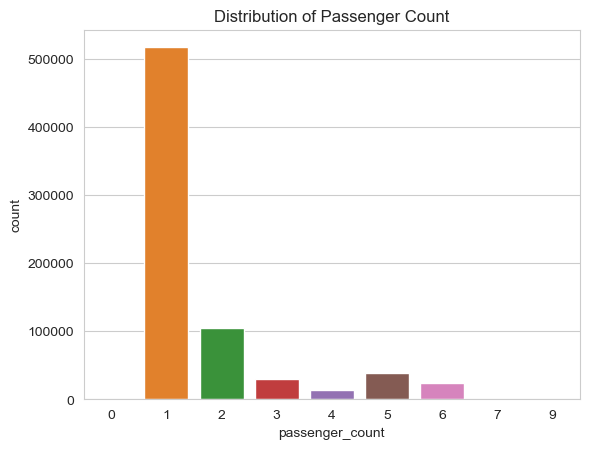

In [16]:
sns.countplot(x= df_taxi['passenger_count'])

plt.title('Distribution of Passenger Count')
plt.show()

In [17]:
df_taxi['pickup_datetime'].nunique()  #  nunique() function return number of unique elements in the object

709359

In [18]:
df_taxi['dropoff_datetime'].nunique()

709308

In [19]:
df_taxi['pickup_day'] = df_taxi['pickup_datetime'].dt.day_name()
df_taxi['dropoff_day'] = df_taxi['dropoff_datetime'].dt.day_name()

In [20]:
df_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday


In [21]:
df_taxi['pickup_day'].value_counts()

Friday       111744
Saturday     110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: pickup_day, dtype: int64

In [22]:
df_taxi['dropoff_day'].value_counts()

Friday       111509
Saturday     110289
Thursday     108918
Wednesday    104944
Tuesday      101142
Sunday        98561
Monday        93959
Name: dropoff_day, dtype: int64

### The distribution of Pickup and Drop Off day of the week

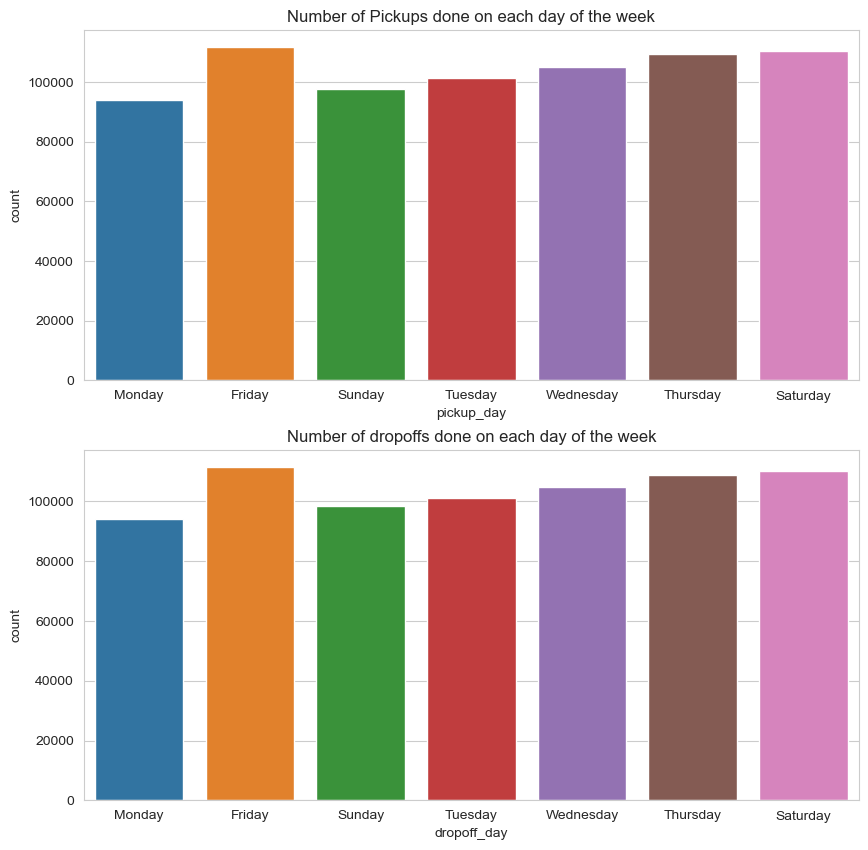

In [23]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df_taxi,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df_taxi,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.show()
plt.tight_layout()

In [24]:
df_taxi['pickup_month'] = pd.DatetimeIndex(df_taxi['pickup_datetime']).month
df_taxi['dropoff_month'] = pd.DatetimeIndex(df_taxi['dropoff_datetime']).month

In [25]:
df_taxi['pickup_month'].value_counts()

3    128316
4    125634
5    124201
2    119364
6    117406
1    114401
Name: pickup_month, dtype: int64

In [26]:
df_taxi['dropoff_month'].value_counts()

3    128284
4    125633
5    124236
2    119361
6    117380
1    114375
7        53
Name: dropoff_month, dtype: int64

In [27]:
df_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,2,2
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,3,3
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,2,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,1,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,2,2


### The distribution of Pickup and Drop Off month of the year

<Figure size 640x480 with 0 Axes>

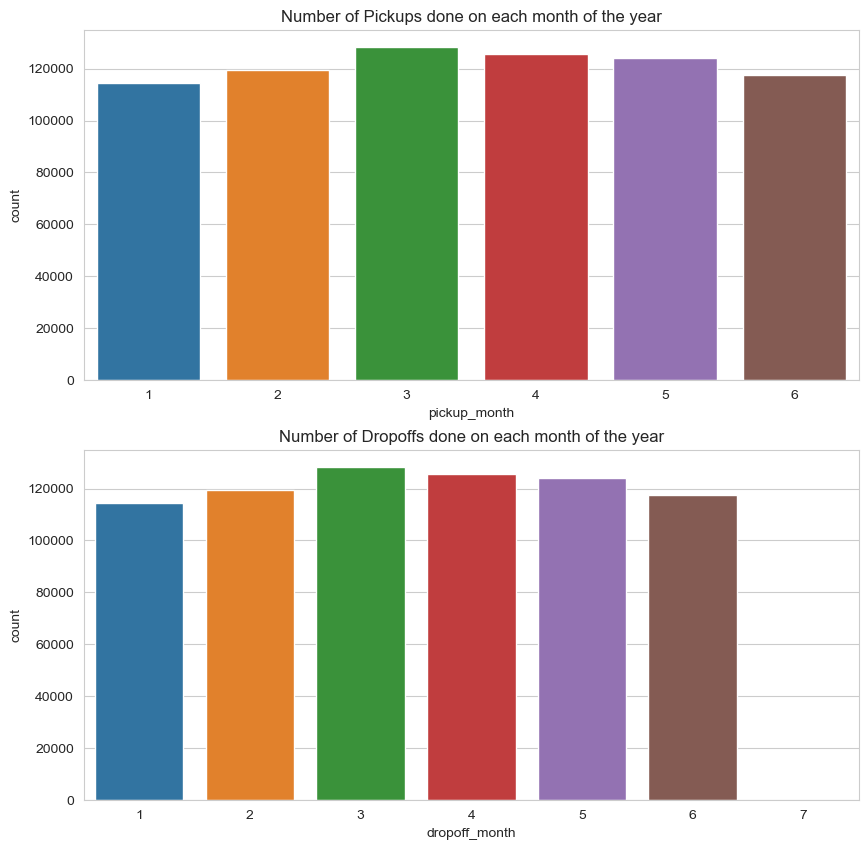

In [28]:
figure, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10));

sns.countplot(x='pickup_month',data=df_taxi,ax=ax[0])
ax[0].set_title('Number of Pickups done on each month of the year')

sns.countplot(x='dropoff_month',data=df_taxi,ax=ax[1])
ax[1].set_title('Number of Dropoffs done on each month of the year')

plt.show()
plt.tight_layout()

### The distribution of Pickup and Drop Off hours of the day

In [29]:
def timezone(x):
    if x >= datetime.time(4, 0, 1) and x <= datetime.time(10, 0, 0):  # Morning Time Zone is : 04th hour to 10th hour.Attributes: hour, minute, second, microsecond, and tzinfo
        return 'morning'
    elif x >= datetime.time(10, 0, 1) and x <= datetime.time(16, 0, 0): # Midday Time Zone is : 10th hour to 16th hour
        return 'midday'
    elif x >= datetime.time(16, 0, 1) and x <= datetime.time(22, 0, 0): # Evening Time Zone is : 16th hour to 22th hour
        return 'evening'
    elif x >= datetime.time(22, 0, 1) or x <= datetime.time(4, 0, 0): # Late Night Time Zone is : 22th hour to 04th hour
        return 'late night'

In [30]:
df_taxi['pickup_timezone'] = df_taxi['pickup_datetime'].apply(lambda x : timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df_taxi['dropoff_timezone']= df_taxi['dropoff_datetime'].apply(lambda x : timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

In [31]:
df_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_timezone,dropoff_timezone
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,2,2,evening,evening
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,3,3,late night,late night
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,2,2,evening,evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,1,1,morning,midday
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,2,2,morning,morning


<Figure size 640x480 with 0 Axes>

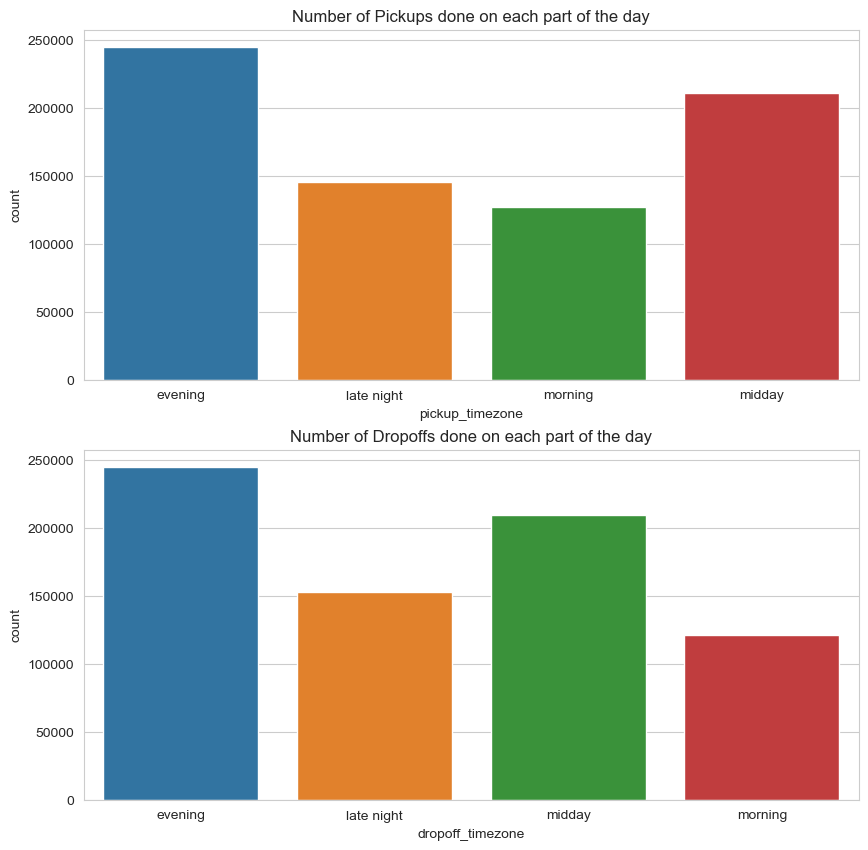

In [32]:
figure, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10));

sns.countplot(x='pickup_timezone',data=df_taxi,ax=ax[0])
ax[0].set_title('Number of Pickups done on each part of the day')

sns.countplot(x='dropoff_timezone',data=df_taxi,ax=ax[1])
ax[1].set_title('Number of Dropoffs done on each part of the day')

plt.show()
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

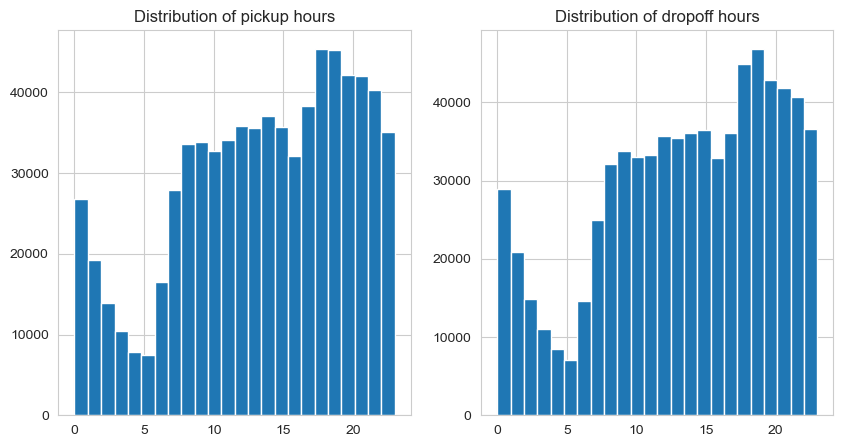

In [33]:
figure,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5));

df_taxi['pickup_hour'] = df_taxi['pickup_datetime'].dt.hour
df_taxi.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')

df_taxi['dropoff_hour'] = df_taxi['dropoff_datetime'].dt.hour
df_taxi.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

plt.show()
plt.tight_layout()

#### Distribution of the stored and forward flag

In [34]:
df_taxi['store_and_fwd_flag'].value_counts()  # The number of N flag is much larger. We can later see whether they have any relation with the duration of the trip.

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

#### Distribution of the trip duration

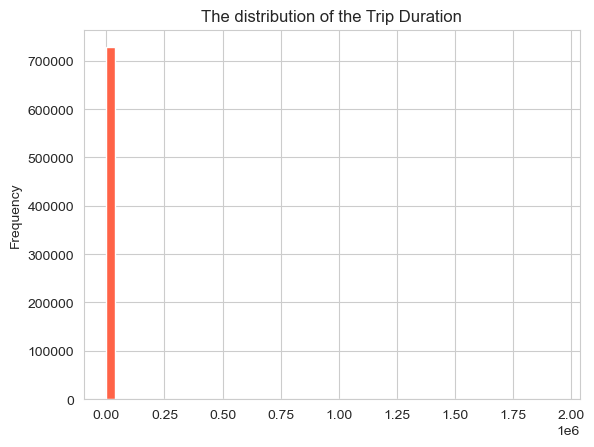

In [35]:
df_taxi['trip_duration'].plot(kind= 'hist', bins = 50, color = 'tomato')
#sns.histplot(df_taxi['trip_duration'])
plt.title('The distribution of the Trip Duration')
plt.show()

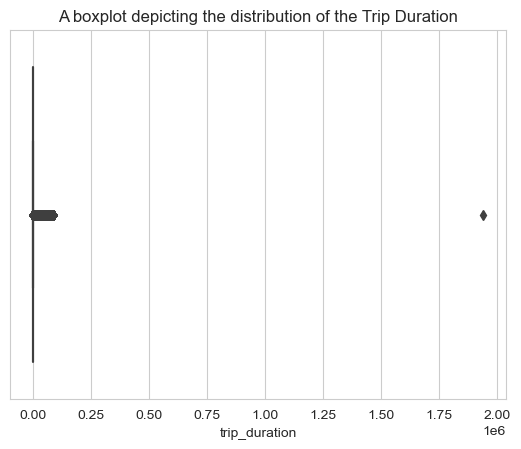

In [36]:
sns.boxplot(x=df_taxi['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the distribution of the Trip Duration')
plt.show()

In [37]:
print(df_taxi['trip_duration'].nlargest(10))

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
90557       86369
673847      86369
163178      86367
179065      86365
248675      86364
Name: trip_duration, dtype: int64


In [38]:
df_taxi=df_taxi[df_taxi.trip_duration!=df_taxi.trip_duration.max()]

In [39]:
print(df_taxi['trip_duration'].nlargest(10))

259437    86391
119185    86387
177225    86378
496391    86377
90557     86369
673847    86369
163178    86367
179065    86365
248675    86364
680575    86363
Name: trip_duration, dtype: int64


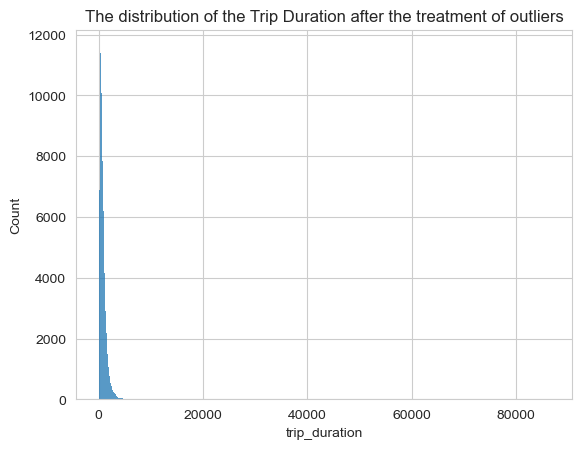

In [40]:
sns.histplot(df_taxi['trip_duration'])
plt.title('The distribution of the Trip Duration after the treatment of outliers')
plt.show()

In [41]:
bins=np.array([0,1800,3600,5400,7200,90000])
df_taxi['duration_time']=pd.cut(df_taxi.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

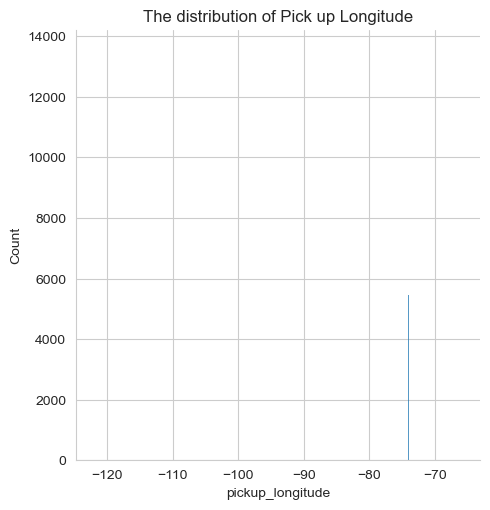

In [42]:
sns.displot(df_taxi['pickup_longitude'])
plt.title('The distribution of Pick up Longitude')
plt.show()

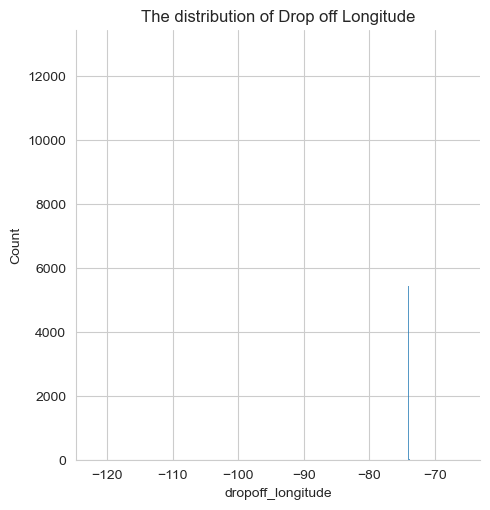

In [43]:
sns.displot(df_taxi['dropoff_longitude'])
plt.title('The distribution of Drop off Longitude')
plt.show()

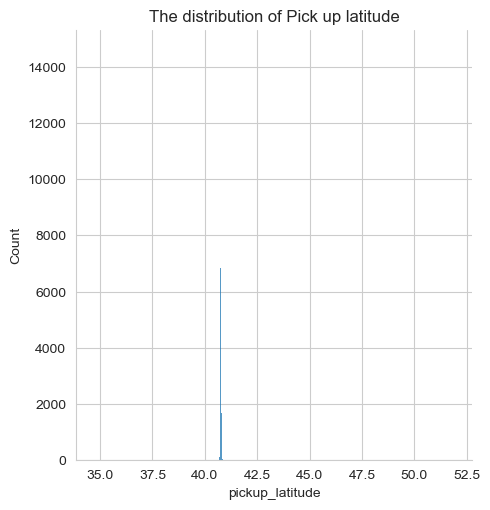

In [45]:
sns.displot(df_taxi['pickup_latitude'])
plt.title('The distribution of Pick up latitude')
plt.show()

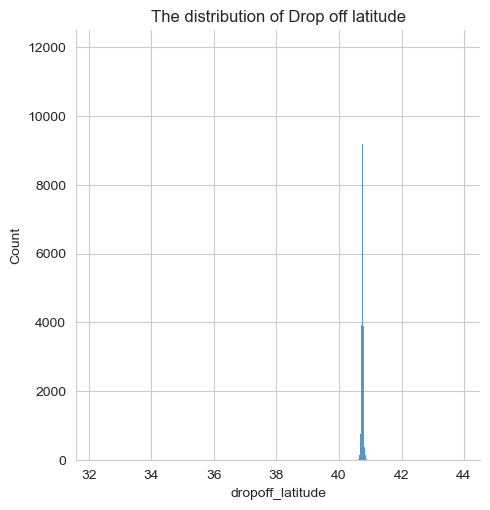

In [46]:
sns.displot(df_taxi['dropoff_latitude'])
plt.title('The distribution of Drop off latitude')
plt.show()

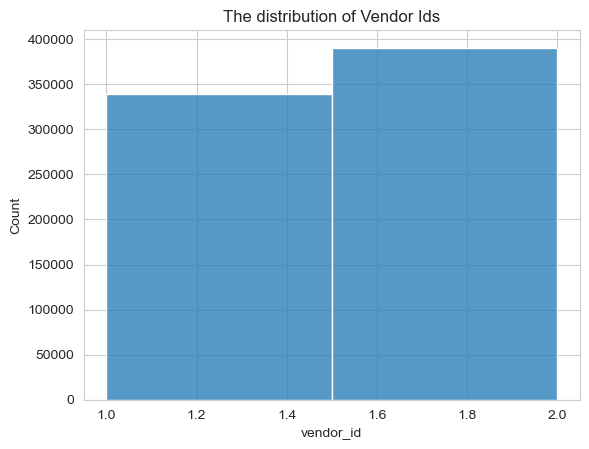

In [49]:
sns.histplot(df_taxi['vendor_id'], bins=2)
plt.title('The distribution of Vendor Ids')
plt.show()